In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [6]:
# Relevant info about all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
# Information about the numeric attributes
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [8]:
# Number of unique values of each attribute
print(df.nunique())

name              255
ingredients       252
diet                2
prep_time          22
cook_time          19
flavor_profile      5
course              4
state              25
region              7
dtype: int64


In [9]:
# Unique values
print(df['diet'].unique())
print(df['flavor_profile'].unique())
print(df['course'].unique())
print(df['region'].unique())
print(df['state'].unique())

['vegetarian' 'non vegetarian']
['sweet' 'spicy' 'bitter' '-1' 'sour']
['dessert' 'main course' 'starter' 'snack']
['East' 'West' 'North' '-1' 'North East' 'South' 'Central' nan]
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' '-1' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']


In [10]:
# Turning the ingredients entry into list instead of a single string
ingredients = []

for row in range(len(df)):
    ing = df['ingredients'][row].replace(" ", "").split(',')
    ingredients.append(ing)
    
df['ingredients'] = ingredients
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [11]:
# Identifying the null value
df[df['region'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"[Wholewheatflour, muskmelonseeds, poppyseeds, ...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [12]:
df[df['state'] == 'Uttar Pradesh']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
6,Jalebi,"[Maida, cornflour, bakingsoda, vinegar, curd, ...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
13,Petha,"[Firmwhitepumpkin, sugar, kitchenlime, alumpow...",vegetarian,10,30,sweet,dessert,Uttar Pradesh,North
15,Rabri,"[Condensedmilk, sugar, spices, nuts]",vegetarian,10,45,sweet,dessert,Uttar Pradesh,North
18,Sohan halwa,"[Cornflour, ghee, dryfruits]",vegetarian,10,60,sweet,dessert,Uttar Pradesh,North
90,Kachori,"[Moongdal, rava, garammasala, dough, fennelseeds]",vegetarian,30,60,spicy,snack,Uttar Pradesh,North
95,Kofta,"[Paneer, potato, cream, cornflour, garammasala]",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
97,Lauki ke kofte,"[Bottlegourd, garammasalapowder, gramflour, gi...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
105,Navrattan korma,"[Greenbeans, potatoes, khuskhus, lowfat, garam...",vegetarian,25,40,spicy,main course,Uttar Pradesh,North
110,Panjeeri,"[Wholewheatflour, muskmelonseeds, poppyseeds, ...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [13]:
# # Correcting the entry and checking if it worked
df['region'] = df['region'].replace(np.nan, 'North')
df[df['state'].isnull()]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region


In [14]:
# Replacing weird entries with sensible values
df['prep_time'] = df['prep_time'].replace(-1, 0)
df['cook_time'] = df['cook_time'].replace(-1, 0)
df['flavor_profile'] = df['flavor_profile'].replace('-1', 'others')
df['region'] = df['region'].replace('-1', 'Others')
df['state'] = df['state'].replace('-1', 'Others')

print(df['flavor_profile'].unique())
print(df['region'].unique())
print(df['state'].unique())
print(df.describe())

['sweet' 'spicy' 'bitter' 'others' 'sour']
['East' 'West' 'North' 'Others' 'North East' 'South' 'Central']
['West Bengal' 'Rajasthan' 'Punjab' 'Uttar Pradesh' 'Others' 'Odisha'
 'Maharashtra' 'Uttarakhand' 'Assam' 'Bihar' 'Andhra Pradesh' 'Karnataka'
 'Telangana' 'Kerala' 'Tamil Nadu' 'Gujarat' 'Tripura' 'Manipur'
 'Nagaland' 'NCT of Delhi' 'Jammu & Kashmir' 'Chhattisgarh' 'Haryana'
 'Madhya Pradesh' 'Goa']
        prep_time   cook_time
count  255.000000  255.000000
mean    31.223529   34.639216
std     72.502844   48.185452
min      0.000000    0.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [15]:
# Lists that will be filled with each ingredient value, repeated or not
East = []
West = []
North = []
Others = []
NorthEast = []
South = []
Central = []

# Filling the lists
for row in range(len(df)):
    if df['region'][row] == 'East':
        East.extend(df['ingredients'][row])
    if df['region'][row] == 'West':
        West.extend(df['ingredients'][row])
    if df['region'][row] == 'North':
        North.extend(df['ingredients'][row])
    if df['region'][row] == 'North East':
        NorthEast.extend(df['ingredients'][row])
    if df['region'][row] == 'South':
        South.extend(df['ingredients'][row])
    if df['region'][row] == 'Central':
        Central.extend(df['ingredients'][row])
    if df['region'][row] == 'Others':
        Others.extend(df['ingredients'][row])




In [16]:
# Series witch include each unique ingredient value
all_ing=pd.Series(East+West+North+Others+NorthEast+South+Central).unique()
# Lists that will store the number of times each ingredient appears
EastC = []
WestC = []
NorthC = []
OthersC = []
NorthEC = []
SouthC = []
CentralC = []

# Filling the lists
for ingredient in all_ing:
    EastC.append(East.count(ingredient))
    WestC.append(West.count(ingredient))
    NorthC.append(North.count(ingredient))
    OthersC.append(Others.count(ingredient))
    NorthEC.append(NorthEast.count(ingredient))
    SouthC.append(South.count(ingredient))
    CentralC.append(Central.count(ingredient))

In [17]:
# Creating the dataset with the values collected
ing_per_region = pd.DataFrame(
    {'East': EastC,
     'West': WestC,
     'North': NorthC,
     'Others': OthersC,
     'North East': NorthEC,
     'South': SouthC,
     'Central': CentralC
     },
     index=all_ing) 

# Adding a column with the sum of all the other columns
ing_per_region['Sum'] = (
    ing_per_region['East'] +
    ing_per_region['West'] +
    ing_per_region['North'] +
    ing_per_region['Others'] +
    ing_per_region['North East'] +
    ing_per_region['South'] +
    ing_per_region['Central'])

ing_per_region.head()

,East,West,North,Others,North East,South,Central,Sum
Maidaflour,1,0,0,0,0,1,0,2
yogurt,1,1,2,0,0,0,0,4
oil,2,2,1,0,0,0,0,5
sugar,14,12,4,5,2,7,0,44
Milkpowder,1,0,0,0,0,0,1,2


sugar                14
Chhena                6
ghee                  6
saffron               4
Milk                  3
cardamom              3
ginger                3
garammasalapowder     2
curd                  2
vegetableoil          2
Name: East, dtype: int64 Index(['sugar', 'Chhena', 'ghee', 'saffron', 'Milk', 'cardamom', 'ginger',
       'garammasalapowder', 'curd', 'vegetableoil'],
      dtype='object')
sugar              12
sesameseeds         8
bengalgramflour     7
Wholewheatflour     6
curryleaves         6
clarifiedbutter     6
ghee                6
jaggery             6
gramflour           6
ginger              5
Name: West, dtype: int64 Index(['sugar', 'sesameseeds', 'bengalgramflour', 'Wholewheatflour',
       'curryleaves', 'clarifiedbutter', 'ghee', 'jaggery', 'gramflour',
       'ginger'],
      dtype='object')
garammasala          22
ginger               10
garammasalapowder     7
kasurimethi           6
tomato                5
cream                 5
butter        

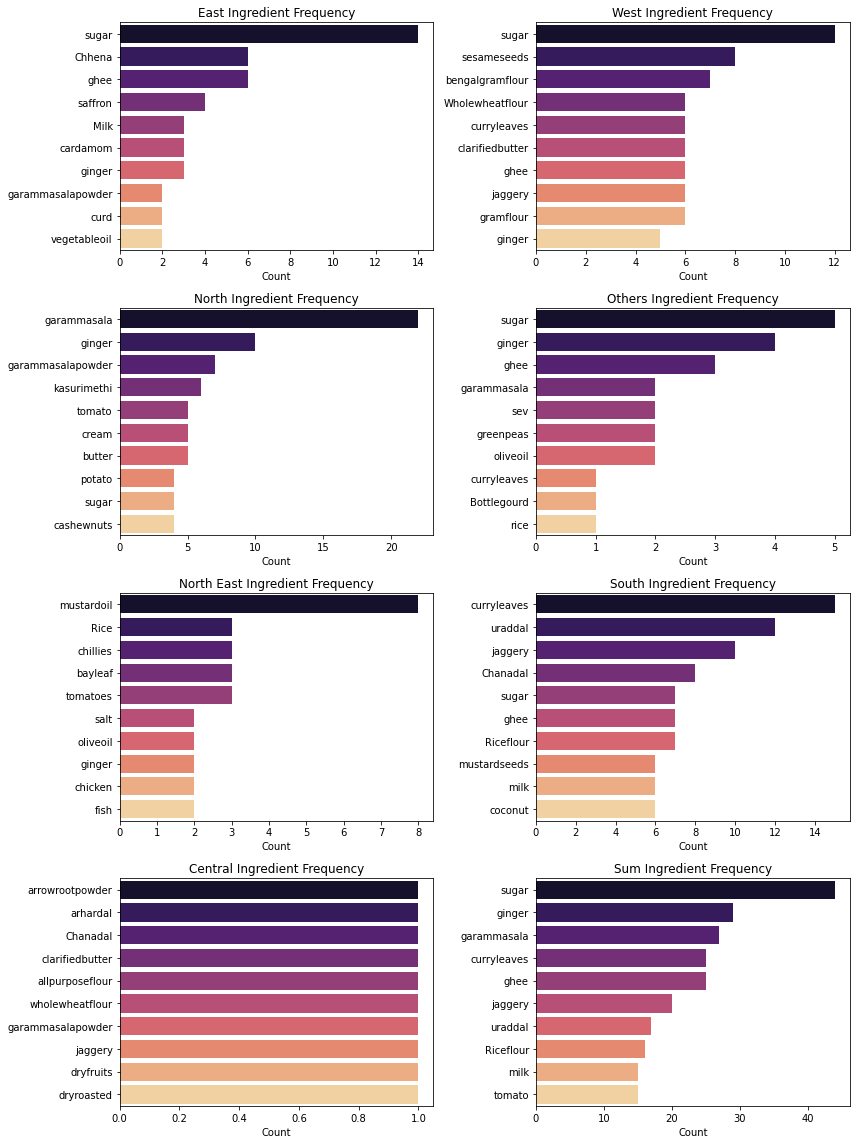

In [40]:
# Plotting the frequency of appearence graphs
plt.figure(figsize=(12,16))

for n, region in enumerate(ing_per_region.columns):
    
    ordered = ing_per_region.sort_values([region], ascending=False)[0:10]
    plt.subplot(4, 2, n+1)
    sns.barplot(x=ordered[region], y=ordered.index, orient='h',palette = 'magma')
    plt.xlabel('Count')
    plt.title(f'{region} Ingredient Frequency')
    
plt.tight_layout()
plt.show()

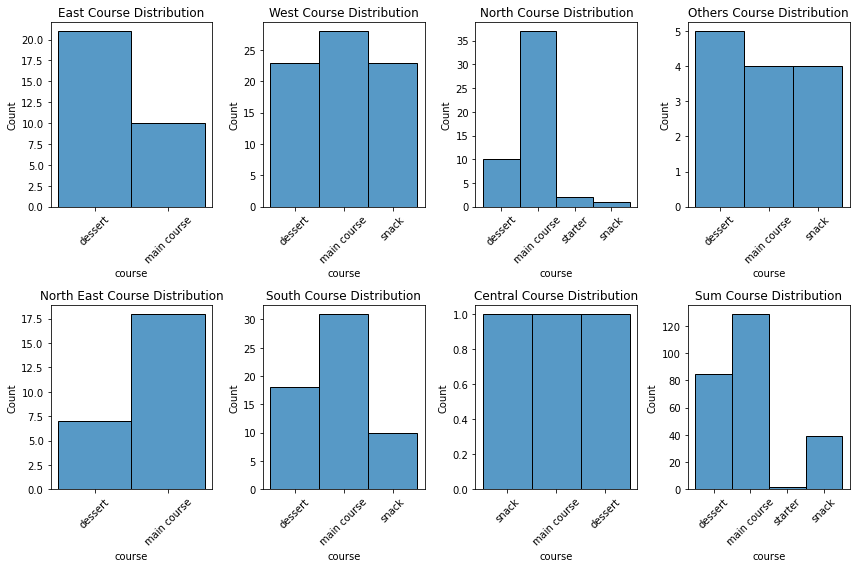

In [28]:
#Distribution Graph
plt.figure(figsize=(12,8))

for n, region in enumerate(ing_per_region.columns):
    if region == 'Sum':
        plt.subplot(2, 4, n+1)
        sns.histplot(df['course'],palette='viridis')
        plt.title('{} Course Distribution'.format(region))
        plt.xticks(rotation=45)
    else:
        plt.subplot(2, 4, n+1)
        sns.histplot(df[df['region'] == region]['course'],palette='viridis')
        plt.title('{} Course Distribution'.format(region))
        plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [20]:
df['Time'] = df['prep_time'] + df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Time
0,Balu shahi,"[Maidaflour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"[Gramflour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"[Carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"[Flour, ghee, kewra, milk, clarifiedbutter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"[Milkpowder, plainflour, bakingpowder, ghee, m...",vegetarian,15,40,sweet,dessert,West Bengal,East,55


In [21]:
df[df['Time']==0]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,Time
65,Pork Bharta,"[Boiledpork, onions, chillies, gingerandgarlic]",non vegetarian,0,0,spicy,main course,Tripura,North East,0
132,Kaara kozhambu,"[Sesameoil, drumstick, tamarindpaste, sambarpo...",vegetarian,0,0,spicy,main course,Tamil Nadu,South,0
134,Keerai masiyal,"[Uraddal, curryleaves, sugar, mustardseeds, sp...",vegetarian,0,0,spicy,main course,Tamil Nadu,South,0
148,Paravannam,"[Rawrice, jaggery, milk]",vegetarian,0,0,spicy,main course,Kerala,South,0
152,Poriyal,"[Chanadal, uraddal, beans, coconut, mustard]",vegetarian,0,0,spicy,main course,Tamil Nadu,South,0
167,Kolim Jawla,"[Baingan, fish, coconutoil, freshcoconut, ginger]",non vegetarian,0,0,spicy,main course,Maharashtra,West,0
172,Bombil fry,"[Bombayduck, malvanimasala, riceflour, bombayr...",non vegetarian,0,0,spicy,main course,Maharashtra,West,0
185,Ghooghra,"[Dryfruits, semolina, allpurposeflour]",vegetarian,0,0,spicy,snack,Gujarat,West,0
187,Halvasan,"[Wholewheatrava, chiaseed, lemon, ediblegum, l...",vegetarian,0,0,sweet,dessert,Gujarat,West,0
213,Mag Dhokli,"[Moongbeans, jaggery, redchillies, oil, salt]",vegetarian,0,0,spicy,snack,Gujarat,West,0


In [22]:
snack = df.loc[(df['Time'] != 0) & (df['course'] == 'snack')]

dessert = df.loc[(df['Time'] != 0) & (df['course'] == 'dessert')]

main = df.loc[(df['Time'] != 0) & (df['course'] == 'main course')]
starter = df.loc[(df['Time'] != 0) & (df['course'] == 'starter')]

fast_snacks = snack.sort_values(['Time'], ascending=True)[0:10]
fast_desserts = dessert.sort_values(['Time'], ascending=True)[0:10]
fast_main = main.sort_values(['Time'], ascending=True)[0:10]
fast_starter = starter.sort_values(['Time'], ascending=True)[0:10]

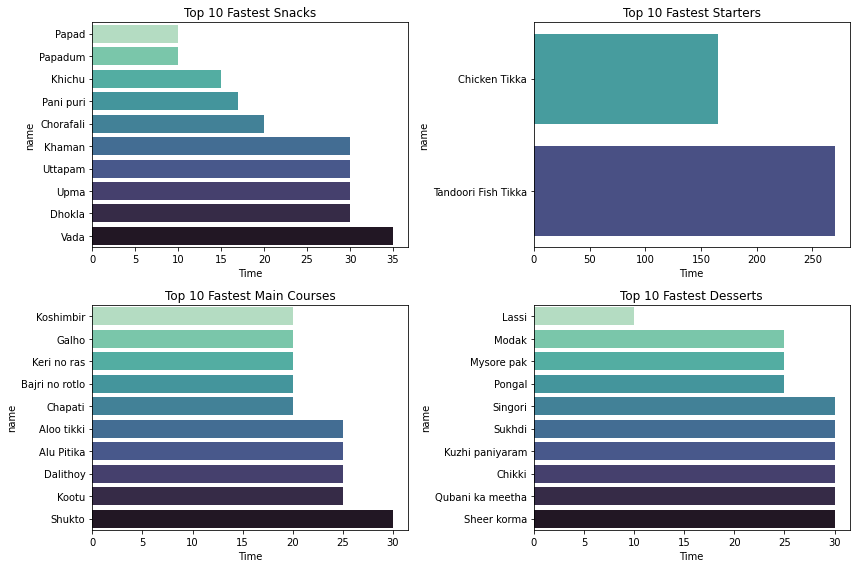

In [33]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.barplot(x=fast_snacks['Time'], y=fast_snacks['name'], orient='h',palette='mako_r')
plt.title('Top 10 Fastest Snacks')

plt.subplot(2,2,2)
sns.barplot(x=fast_starter['Time'], y=fast_starter['name'], orient='h',palette='mako_r')
plt.title('Top 10 Fastest Starters')

plt.subplot(2,2,3)
sns.barplot(x=fast_main['Time'], y=fast_main['name'], orient='h',palette='mako_r')
plt.title('Top 10 Fastest Main Courses')

plt.subplot(2,2,4)
sns.barplot(x=fast_desserts['Time'], y=fast_desserts['name'], orient='h',palette='mako_r')
plt.title('Top 10 Fastest Desserts')

plt.tight_layout()
plt.show()

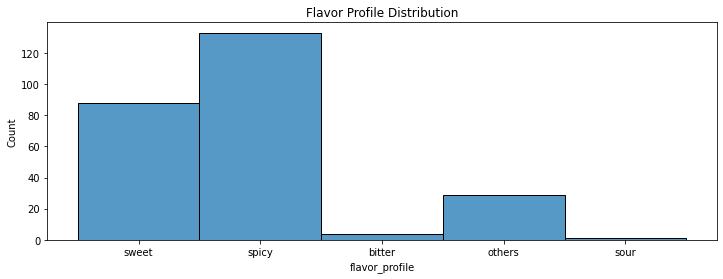

In [36]:
plt.figure(figsize=(12,4))
sns.histplot(df['flavor_profile'])
plt.title('Flavor Profile Distribution')

plt.show()

In [25]:
Sweet = []
Spicy = []
Bitter = []
Others = []
Sour = []

for row in range(len(df)):
    if df['flavor_profile'][row] == 'sweet':
        Sweet.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'spicy':
        Spicy.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'bitter':
        Bitter.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'others':
        Others.extend(df['ingredients'][row])
    if df['flavor_profile'][row] == 'sour':
        Sour.extend(df['ingredients'][row])

all_ing = pd.Series(Sweet+Spicy+Bitter+Others+Sour).unique()

SweetC = []
SpicyC = []
BitterC = []
OthersC = []
SourC = []

for ingredient in all_ing:
    SweetC.append(Sweet.count(ingredient))
    SpicyC.append(Spicy.count(ingredient))
    BitterC.append(Bitter.count(ingredient))
    OthersC.append(Others.count(ingredient))
    SourC.append(Sour.count(ingredient))
    
ing_per_flavor = pd.DataFrame(
    {'Sweet': SweetC,
     'Spicy': SpicyC,
     'Bitter': BitterC, 
     'Others': OthersC,
     'Sour': SourC},
     index=all_ing)

ing_per_flavor.head()

,Sweet,Spicy,Bitter,Others,Sour
Maidaflour,2,0,0,0,0
yogurt,1,3,0,0,0
oil,2,1,1,1,0
sugar,36,6,0,1,1
Gramflour,3,1,0,0,0


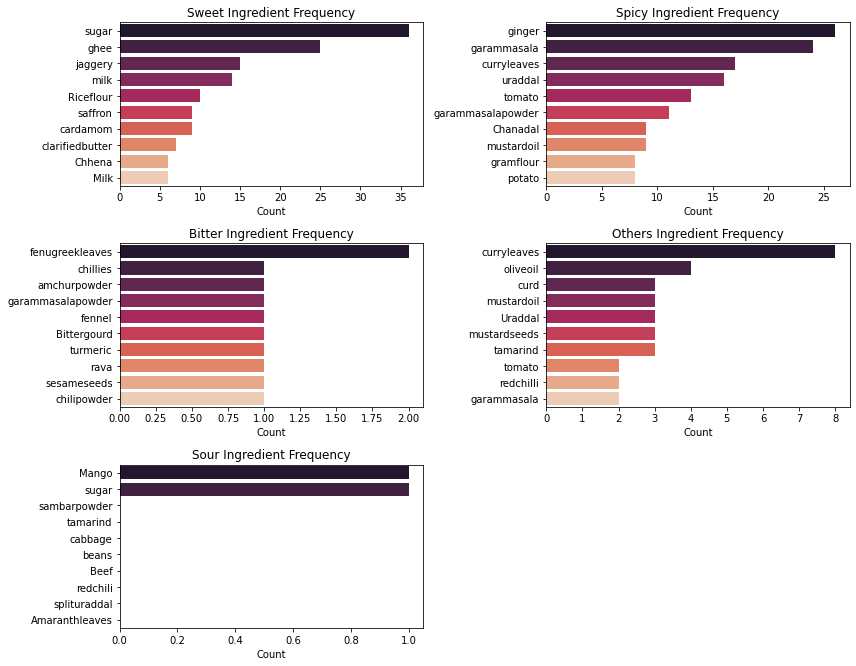

In [37]:
plt.figure(figsize=(12,12))

for n, flavor in enumerate(ing_per_flavor.columns):
    ordered = ing_per_flavor.sort_values([flavor], ascending=False)[0:10]
    plt.subplot(4, 2, n+1)
    sns.barplot(x=ordered[flavor], y=ordered.index, orient='h',palette='rocket')
    plt.xlabel('Count')
    plt.title(f'{flavor} Ingredient Frequency')
    
plt.tight_layout()
plt.show()